<a href="https://colab.research.google.com/github/Sukheshgupta/ShadowFox/blob/main/BostonHousePredipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd

# Load the dataset
file_path = "/content/HousingData.csv"
data = pd.read_csv(file_path)

# Display the first few rows
data.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


//checking missing values

In [5]:
print(data.isnull().sum())


CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64


In [6]:
print(data.info())  # Get column types
print(data.describe())  # Summary statistics


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB
None
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  486.000000  486.000000  486.000000  486.000000  506.000000  506.000000   
mean     3.611874   11.211934   11.083992    0.069959    0.554695   

CODE VISUALZATION


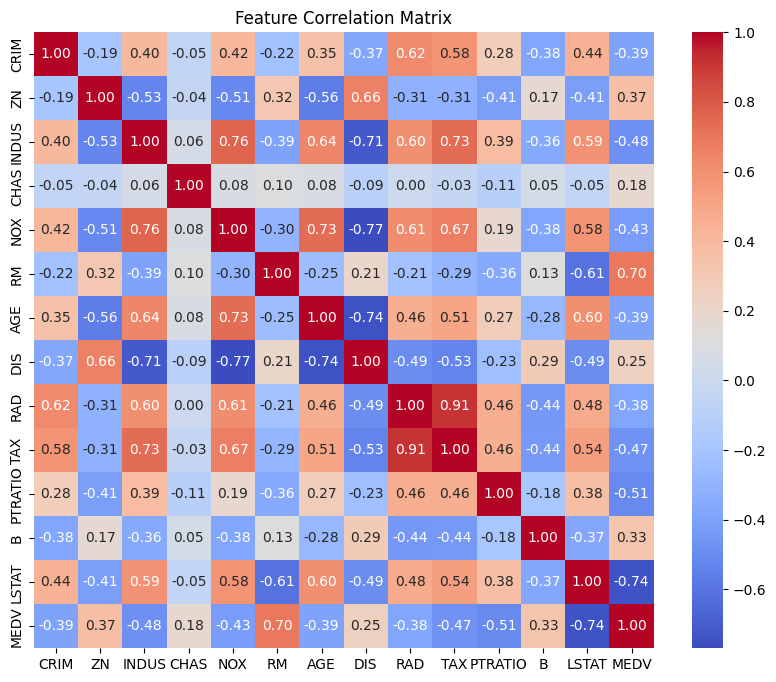

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()


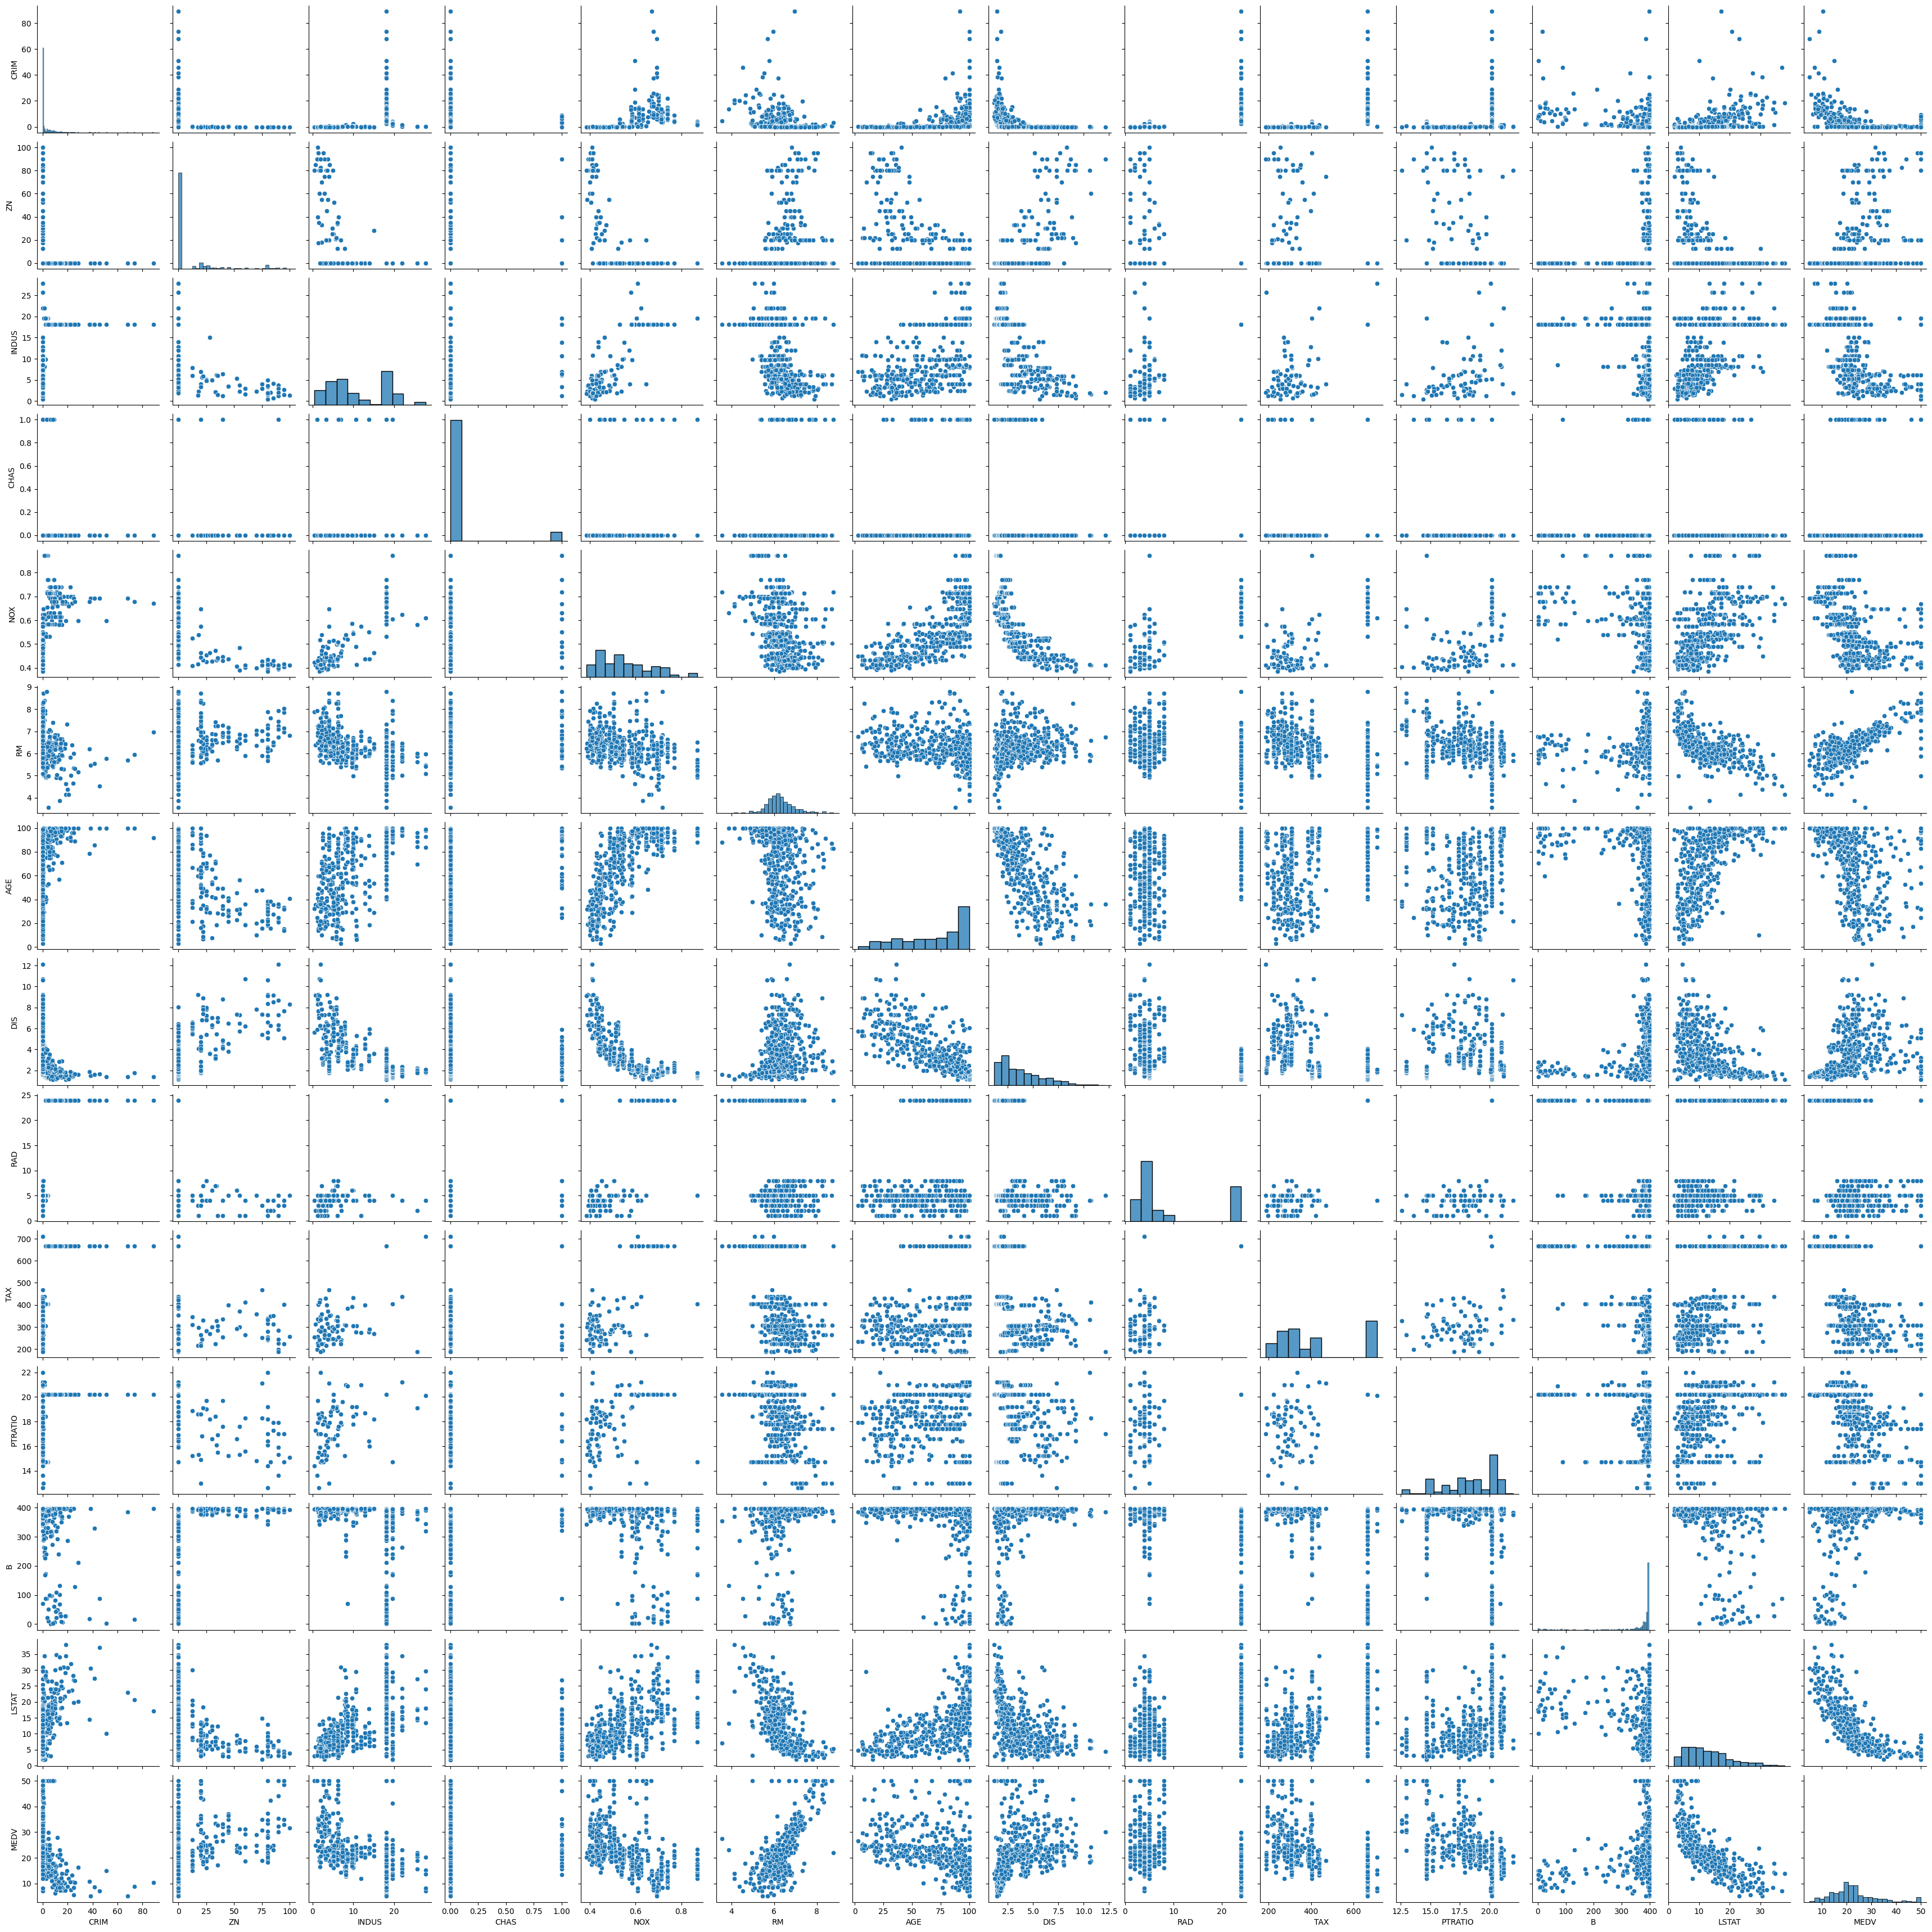

In [8]:
sns.pairplot(data)
plt.show()


PREPROCESSING

In [9]:
data = data.dropna()  # Remove missing values


In [10]:
X = data.drop(columns=["MEDV"])  # Features
y = data["MEDV"]  # Target (house price)


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


TRAINING REGRESSION MODEL

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


Mean Squared Error: 31.45404766495083
R² Score: 0.6270849941673196


VISUALIZE PREDICTIONS

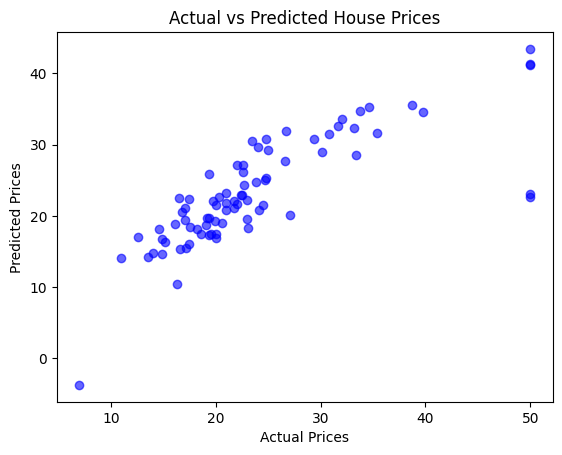

In [14]:
plt.scatter(y_test, y_pred, color="blue", alpha=0.6)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()


TRAINING THE MODEL WITH OTHER MODELS

***RANDOM FOREST***

In [15]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions & Evaluation
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - MSE: {mse_rf}, R² Score: {r2_rf}")


Random Forest - MSE: 28.614914050632912, R² Score: 0.6607453847034125


FEATURE SELECTION

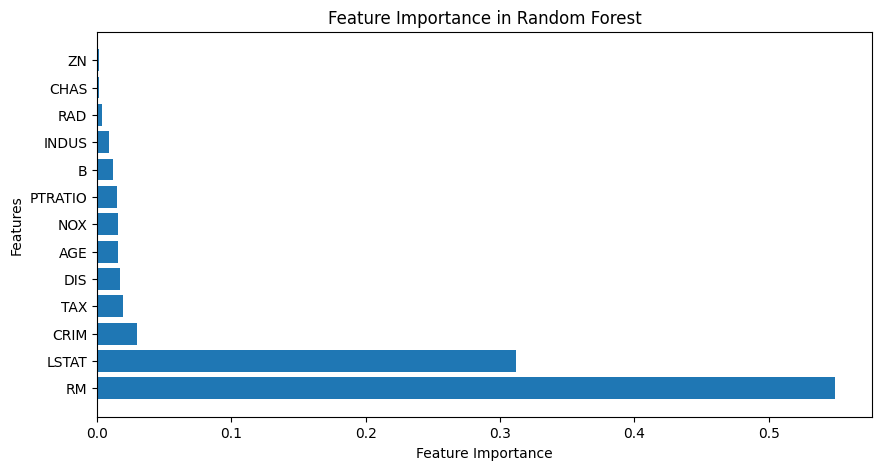

In [16]:
# Get feature importance
feature_importance = rf_model.feature_importances_
sorted_idx = np.argsort(feature_importance)[::-1]

# Plot feature importance
plt.figure(figsize=(10, 5))
plt.barh([X.columns[i] for i in sorted_idx], feature_importance[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Random Forest")
plt.show()


In [17]:
# Select only important features
important_features = [X.columns[i] for i in sorted_idx if feature_importance[i] > 0.02]
X_train_new = X_train[important_features]
X_test_new = X_test[important_features]

# Retrain the Random Forest model with selected features
rf_model.fit(X_train_new, y_train)
y_pred_rf_new = rf_model.predict(X_test_new)

# Evaluate performance
mse_rf_new = mean_squared_error(y_test, y_pred_rf_new)
r2_rf_new = r2_score(y_test, y_pred_rf_new)

print(f"New Random Forest - MSE: {mse_rf_new}, R² Score: {r2_rf_new}")


New Random Forest - MSE: 27.621034620253166, R² Score: 0.6725286870473597


***Hyperparameter Tuning for Random Forest***

In [18]:
from sklearn.model_selection import RandomizedSearchCV

# Define hyperparameter grid
param_grid = {
    "n_estimators": [100, 200, 300, 400],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
}

# RandomizedSearchCV to find the best parameters
rf_grid = RandomizedSearchCV(RandomForestRegressor(), param_grid, cv=5, n_iter=20, scoring="r2", random_state=42, n_jobs=-1)
rf_grid.fit(X_train_new, y_train)

# Best parameters
print("Best Parameters:", rf_grid.best_params_)

# Train best model
best_rf_model = RandomForestRegressor(**rf_grid.best_params_)
best_rf_model.fit(X_train_new, y_train)

# Predict and evaluate
y_pred_best = best_rf_model.predict(X_test_new)
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f"Optimized Random Forest - MSE: {mse_best}, R² Score: {r2_best}")


Best Parameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 10}
Optimized Random Forest - MSE: 29.41263505883729, R² Score: 0.6512877105243633


***XGBOOST***

In [19]:
from xgboost import XGBRegressor

# Initialize XGBoost model
xgb_model = XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=6)
xgb_model.fit(X_train_new, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test_new)

# Evaluate XGBoost
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost Model - MSE: {mse_xgb}, R² Score: {r2_xgb}")


XGBoost Model - MSE: 33.19877600823017, R² Score: 0.6063997269724251


THE BEST MODEL IS RANDOM FOREST

In [20]:
import joblib

# Save the best-performing Random Forest model
joblib.dump(rf_model, "best_house_price_model.pkl")


['best_house_price_model.pkl']